In [22]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
X,y = make_moons(100,noise=0.25,random_state=2)

In [4]:
X.shape

(100, 2)

In [17]:
y.max()

1

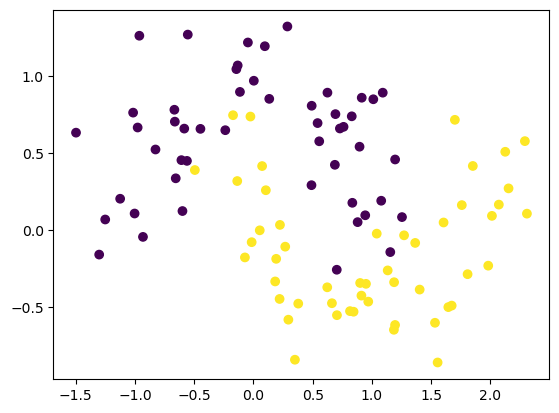

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [8]:
model_1=Sequential()

model_1.add(Dense(128,input_dim=2,activation='relu'))
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(1,activation='sigmoid'))

model_1.summary()

C:\Users\Rahul Sahu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
adam=Adam(learning_rate=0.01)
model_1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history_1=model_1.fit(X,y,epochs=500,validation_split=0.2,verbose=1)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.6891 - loss: 0.6120 - val_accuracy: 0.9000 - val_loss: 0.3557
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8070 - loss: 0.4316 - val_accuracy: 0.9000 - val_loss: 0.2074
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8266 - loss: 0.4323 - val_accuracy: 0.8500 - val_loss: 0.1992
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8148 - loss: 0.3979 - val_accuracy: 0.9000 - val_loss: 0.3577
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8344 - loss: 0.3793 - val_accuracy: 0.9000 - val_loss: 0.3619
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8031 - loss: 0.3949 - val_accuracy: 0.9000 - val_loss: 0.2651
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8664 - loss: 0.3153 - val_accuracy: 0.9000 - val_loss: 0.2068
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8344 - loss: 0.3273 - val_accuracy: 0.9000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


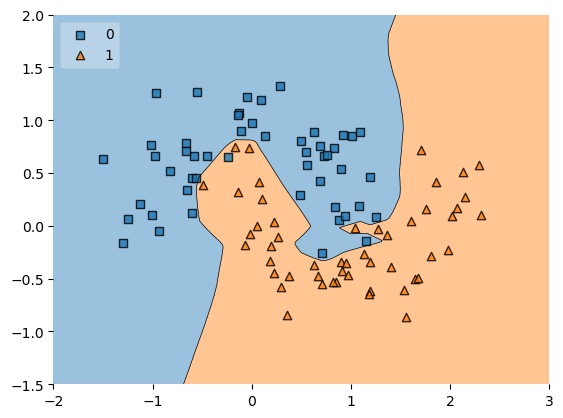

In [13]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model_1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

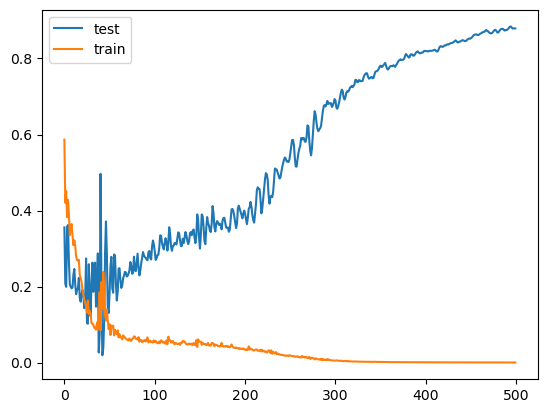

In [20]:
plt.plot(history_1.history['val_loss'],label='test')
plt.plot(history_1.history['loss'],label='train')
plt.legend()
plt.show()

In [70]:
# Regularization
from tensorflow.keras import regularizers

model_2=Sequential()
model_2.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model_2.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model_2.add(Dense(1,activation='sigmoid'))

model_2.summary()

C:\Users\Rahul Sahu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
adam = Adam(learning_rate=0.01)

model_2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history_2=model_2.fit(X,y,validation_split=0.2,epochs=500,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


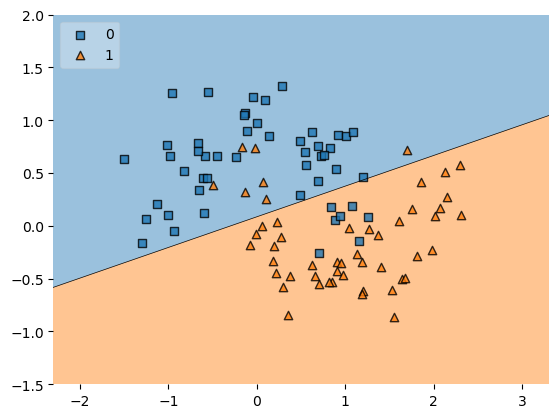

In [72]:
plot_decision_regions(X,y.astype('int'),clf=model_2,legend=2)
plt.xlim(-2.3)
plt.ylim(-1.5,2)
plt.show()

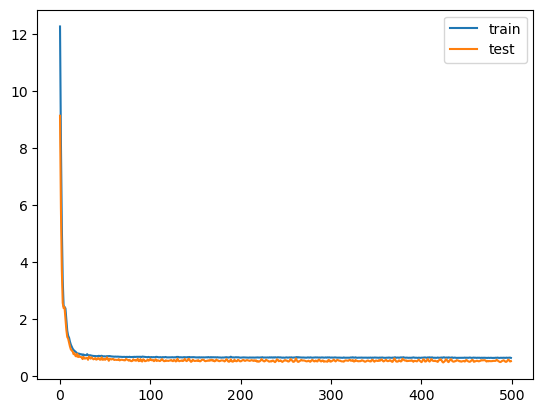

In [73]:
plt.plot(history_2.history['loss'],label='train')
plt.plot(history_2.history['val_loss'],label='test')
plt.legend()
plt.show()


In [74]:
# fetching weights -> reshape
model_1weights_layer1=model_1.get_weights()[0].reshape(256)
model_2weights_layer1=model_2.get_weights()[0].reshape(256)

<Axes: >

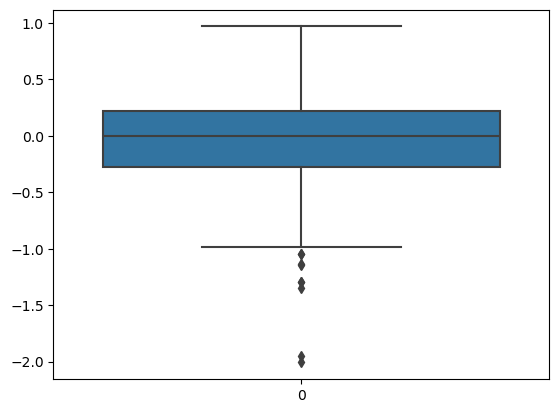

In [75]:
import seaborn as sns
sns.boxplot(model_1weights_layer1)

In [76]:
model_1weights_layer1.min()

-2.0073414

<Axes: >

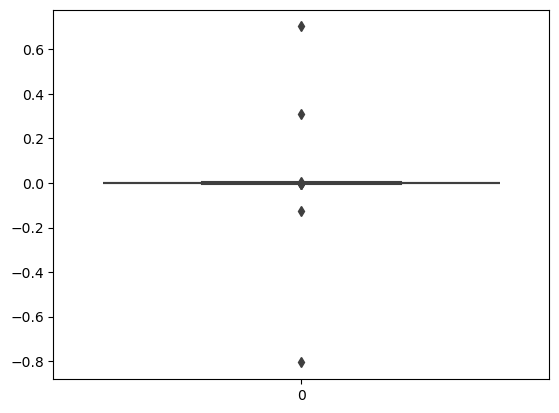

In [77]:
sns.boxplot(model_2weights_layer1)

In [78]:
model_2weights_layer2.max()

0.4562903

C:\Users\Rahul Sahu\AppData\Local\Temp\ipykernel_15816\3312231619.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_1weights_layer1,color='red')
C:\Users\Rahul Sahu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rahul Sahu\AppData\Local\Temp\ipykernel_15816\3312231619.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-lev

<Axes: ylabel='Density'>

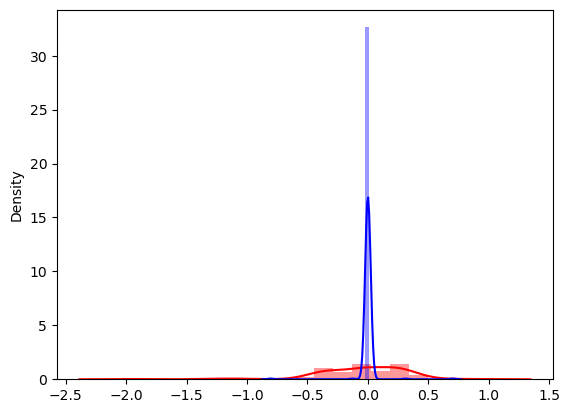

In [79]:
sns.distplot(model_1weights_layer1,color='red')
sns.distplot(model_2weights_layer1,color='blue')